In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, Dense ,Flatten , MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [18]:
classifier = Sequential()

In [19]:
#CONVOLUTION
classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3),activation = 'relu'))

#POOLING
classifier.add(MaxPooling2D(pool_size =(2,2)))

#2nd Layer
classifier.add(Convolution2D(32,3,3,activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

classifier.add(Flatten())

#Full connection
classifier.add(Dense(output_dim =128,activation = 'relu'))
classifier.add(Dense(output_dim =1,activation = 'sigmoid'))



In [20]:
#compile the CNN
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory(r'C:\Users\HP\Desktop\DS\udemy\DL and ML Practical Tutorials - Package\New folder\cell_images\train',
                                               target_size = (64,64),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 22046 images belonging to 2 classes.


In [33]:
testing_set = test_datagen.flow_from_directory(r'C:\Users\HP\Desktop\DS\udemy\DL and ML Practical Tutorials - Package\New folder\cell_images\valid',
                                               target_size = (64,64),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 5512 images belonging to 2 classes.


In [34]:
classifier.fit_generator(training_set,
                        samples_per_epoch = 8000,
                        nb_epoch = 25,
                        validation_data = testing_set,
                        nb_val_samples = 2000)

Epoch 1/25
250/250 [==============================] - 522s 2s/step - loss: 0.6928 - accuracy: 0.5364 - val_loss: 0.6624 - val_accuracy: 0.5741
Epoch 2/25
250/250 [==============================] - 444s 2s/step - loss: 0.6682 - accuracy: 0.5939 - val_loss: 0.6486 - val_accuracy: 0.6156
Epoch 3/25
250/250 [==============================] - 262s 1s/step - loss: 0.6554 - accuracy: 0.6121 - val_loss: 0.6524 - val_accuracy: 0.6517
Epoch 4/25
250/250 [==============================] - 200s 802ms/step - loss: 0.6117 - accuracy: 0.6687 - val_loss: 0.5240 - val_accuracy: 0.7621
Epoch 5/25
250/250 [==============================] - 191s 762ms/step - loss: 0.5345 - accuracy: 0.7369 - val_loss: 0.3618 - val_accuracy: 0.7767
Epoch 6/25
250/250 [==============================] - 205s 820ms/step - loss: 0.4039 - accuracy: 0.8211 - val_loss: 0.2850 - val_accuracy: 0.8830
Epoch 7/25
250/250 [==============================] - 190s 761ms/step - loss: 0.2881 - accuracy: 0.8861 - val_loss: 0.1509 - val_accu

In [37]:
import matplotlib.pyplot as plt

Infected


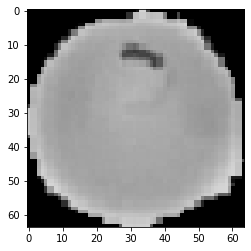

In [51]:

test_images1 = image.load_img(r'C:\Users\HP\Desktop\DS\udemy\DL and ML Practical Tutorials - Package\New folder\cell_images\random2.png',target_size =(64,64))
test_images = image.img_to_array(test_images1)
test_images = np.expand_dims(test_images , axis = 0)
result = classifier.predict(test_images)
training_set.class_indices

if result[0][0]>=0.5:
    prediction ='Not infected'
else:
    prediction='Infected'
    
print(prediction)
plt.imshow(test_images1)

Not infected


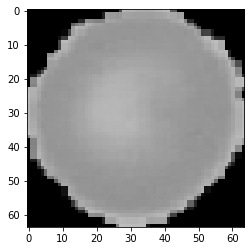

In [52]:

test_images1 = image.load_img(r'C:\Users\HP\Desktop\DS\udemy\DL and ML Practical Tutorials - Package\New folder\cell_images\random3.png',target_size =(64,64))
test_images = image.img_to_array(test_images1)
test_images = np.expand_dims(test_images , axis = 0)
result = classifier.predict(test_images)
training_set.class_indices

if result[0][0]>=0.5:
    prediction ='Not infected'
else:
    prediction='Infected'
    
print(prediction)
plt.imshow(test_images1)